# Example Workbook for HDAC CBE Analysis

In [1]:
import be_scan
import warnings
warnings.filterwarnings('ignore')

In [2]:
fasta_file_dir = '../../../../../../Downloads/HDAC_Data/CBE/'

sample_sheet = '../../../tests/test_data/HDAC_data/231208_HDAC1_batch.csv'
in_ref = '../../../tests/test_data/HDAC_data/XYH_annotated_HDAC1_ABE.csv'
in_comparisons = '../../../tests/test_data/HDAC_data/comparisons.csv'

In [3]:
be_scan.analysis.count_reads(
    sample_sheet, in_ref, file_dir = fasta_file_dir, KEY_REV  = 'GTTTGAGA', 
)

../../../../../../Downloads/HDAC_Data/CBE/MY400-D0_S45_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted1_S49_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted2_S50_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Unsorted3_S51_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted1_S52_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted2_S53_L001_R1_001.fastq.gz processed
../../../../../../Downloads/HDAC_Data/CBE/MY400-Sorted3_S54_L001_R1_001.fastq.gz processed


In [3]:
be_scan.analysis.merge_and_norm(
    sample_sheet, in_ref=fasta_file_dir+'counts_library.csv', file_dir = fasta_file_dir, 
)

Merge and normalize completed


,Unnamed: 0,sgRNA_seq,sgRNA context sequence,Gene Symbol,Transcript reference allele.x,Transcript alternate allele.x,Genome reference allele.x,Genome alternate allele.x,Chromosome.x,sgRNA Strand.x,...,unsorted-3t0,sorted-1,sorted-1log2,sorted-1t0,sorted-2,sorted-2log2,sorted-2t0,sorted-3,sorted-3log2,sorted-3t0
0,0,GACTGACGGTAGGGACGGGA,GACCGACTGACGGTAGGGACGGGAGGCGA,HDAC1,A,G,A,G,1,sense,...,-143.389111,210,9.826863,-143.173137,260,9.878294,-143.121706,207,9.868169,-143.131831
1,1,CGCCTCCCGTCCCTACCGTC,TGCTCGCCTCCCGTCCCTACCGTCAGTCG,HDAC1,T,C,T,C,1,antisense,...,-158.637791,151,9.351643,-158.648357,193,9.448916,-158.551084,149,9.394451,-158.605549
2,2,CTGACGGTAGGGACGGGAGG,CCGACTGACGGTAGGGACGGGAGGCGAGC,HDAC1,A,G,A,G,1,sense,...,-99.116096,126,9.090956,-98.909044,145,9.037051,-98.962949,130,9.197964,-98.802036
3,3,GACGGTAGGGACGGGAGGCG,GACTGACGGTAGGGACGGGAGGCGAGCAA,HDAC1,A,G,A,G,1,sense,...,-157.606811,135,9.190315,-157.809685,209,9.563660,-157.436340,174,9.617918,-157.382082
4,4,TGCTCGCCTCCCGTCCCTAC,ATCTTGCTCGCCTCCCGTCCCTACCGTCA,HDAC1,T,C,T,C,1,antisense,...,-243.883023,248,10.066570,-243.933430,311,10.136446,-243.863554,241,10.087353,-243.912647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1208,GCTTCCTGCTGAGTCCCTCA,TCTGGCTTCCTGCTGAGTCCCTCACGTTT,HDAC1,A,G,A,G,1,sense,...,-218.926990,228,9.945382,-219.054618,288,10.025703,-218.974297,216,9.929505,-219.070495
1209,1209,ACGTGAGGGACTCAGCAGGA,AGAAACGTGAGGGACTCAGCAGGAAGCCA,HDAC1,T,C,T,C,1,antisense,...,-180.177060,219,9.887339,-180.112661,222,9.650605,-180.349395,191,9.752240,-180.247760
1210,1210,GAAACGTGAGGGACTCAGCA,GGAAGAAACGTGAGGGACTCAGCAGGAAG,HDAC1,T,C,T,C,1,antisense,...,-167.566512,138,9.221970,-167.778030,151,9.095438,-167.904562,140,9.304703,-167.695297
1211,1211,AGAAACGTGAGGGACTCAGC,GGGAAGAAACGTGAGGGACTCAGCAGGAA,HDAC1,T,C,T,C,1,antisense,...,-204.025975,219,9.887339,-204.112661,283,10.000460,-203.999540,177,9.642549,-204.357451


In [5]:
be_scan.analysis.batch_process(
    sample_sheet,
    in_ref,
    in_comparisons,
    file_dir = fasta_file_dir,
    KEY_REV  = 'GTTTGAGA', 
)

AttributeError: 'str' object has no attribute 'count_nonzero'

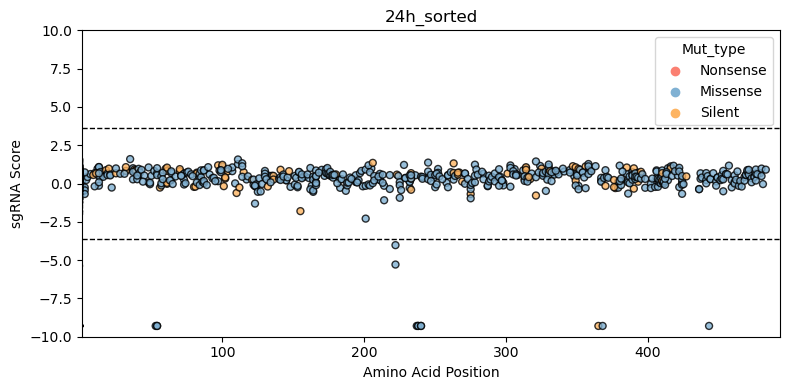

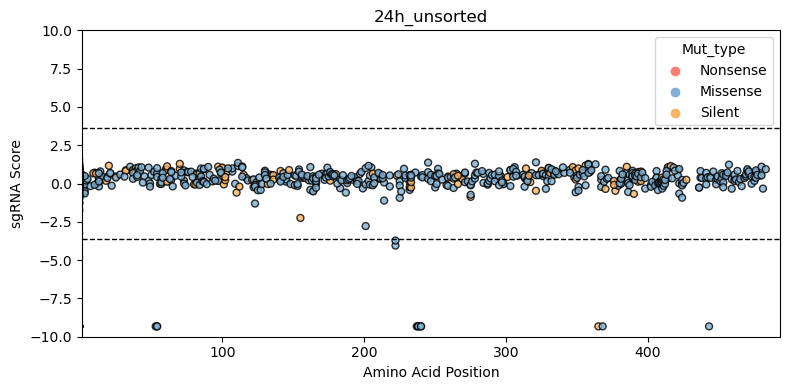

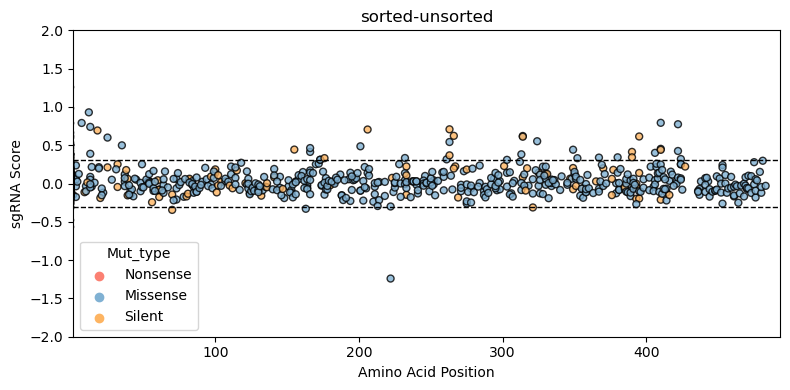

In [4]:
be_scan.plot.plot_scatterplot(df_filepath       =  fasta_file_dir + "agg_comps.csv", 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', "24h_unsorted", 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              savefig           = False,
                              xmin=1
                              )